<a href="https://colab.research.google.com/github/zainamri/Kelompok-3-/blob/main/SalinanKlasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# Akses dataset
file_path = ('/content/drive/MyDrive/datasetdah/heart_failure_clinical_records_dataset.csv')
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# Check for missing values
print(data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [ ]:
# List of columns to convert
binary_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

# Convert integer columns to boolean
for col in binary_columns:
    data[col] = data[col].astype(bool)

# Verify the changes
print(data.dtypes)

age                         float64
anaemia                        bool
creatinine_phosphokinase      int64
diabetes                       bool
ejection_fraction             int64
high_blood_pressure            bool
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                            bool
smoking                        bool
time                          int64
DEATH_EVENT                    bool
dtype: object


In [ ]:
# Assuming df is already loaded and categorical columns are converted to bool
# List of categorical columns
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

# Create a function to display counts and percentages
def display_categorical_distribution(df, columns):
    for col in columns:
        print(f"Distribution for {col}:")
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100
        distribution = pd.DataFrame({'Count': counts, 'Percentage': percentages})
        print(distribution)
        print()  # New line for better readability

# Display the distribution for all categorical columns
display_categorical_distribution(data, categorical_columns)

Distribution for anaemia:
         Count  Percentage
anaemia                   
False      170   56.856187
True       129   43.143813

Distribution for diabetes:
          Count  Percentage
diabetes                   
False       174    58.19398
True        125    41.80602

Distribution for high_blood_pressure:
                     Count  Percentage
high_blood_pressure                   
False                  194   64.882943
True                   105   35.117057

Distribution for sex:
       Count  Percentage
sex                     
True     194   64.882943
False    105   35.117057

Distribution for smoking:
         Count  Percentage
smoking                   
False      203   67.892977
True        96   32.107023

Distribution for DEATH_EVENT:
             Count  Percentage
DEATH_EVENT                   
False          203   67.892977
True            96   32.107023



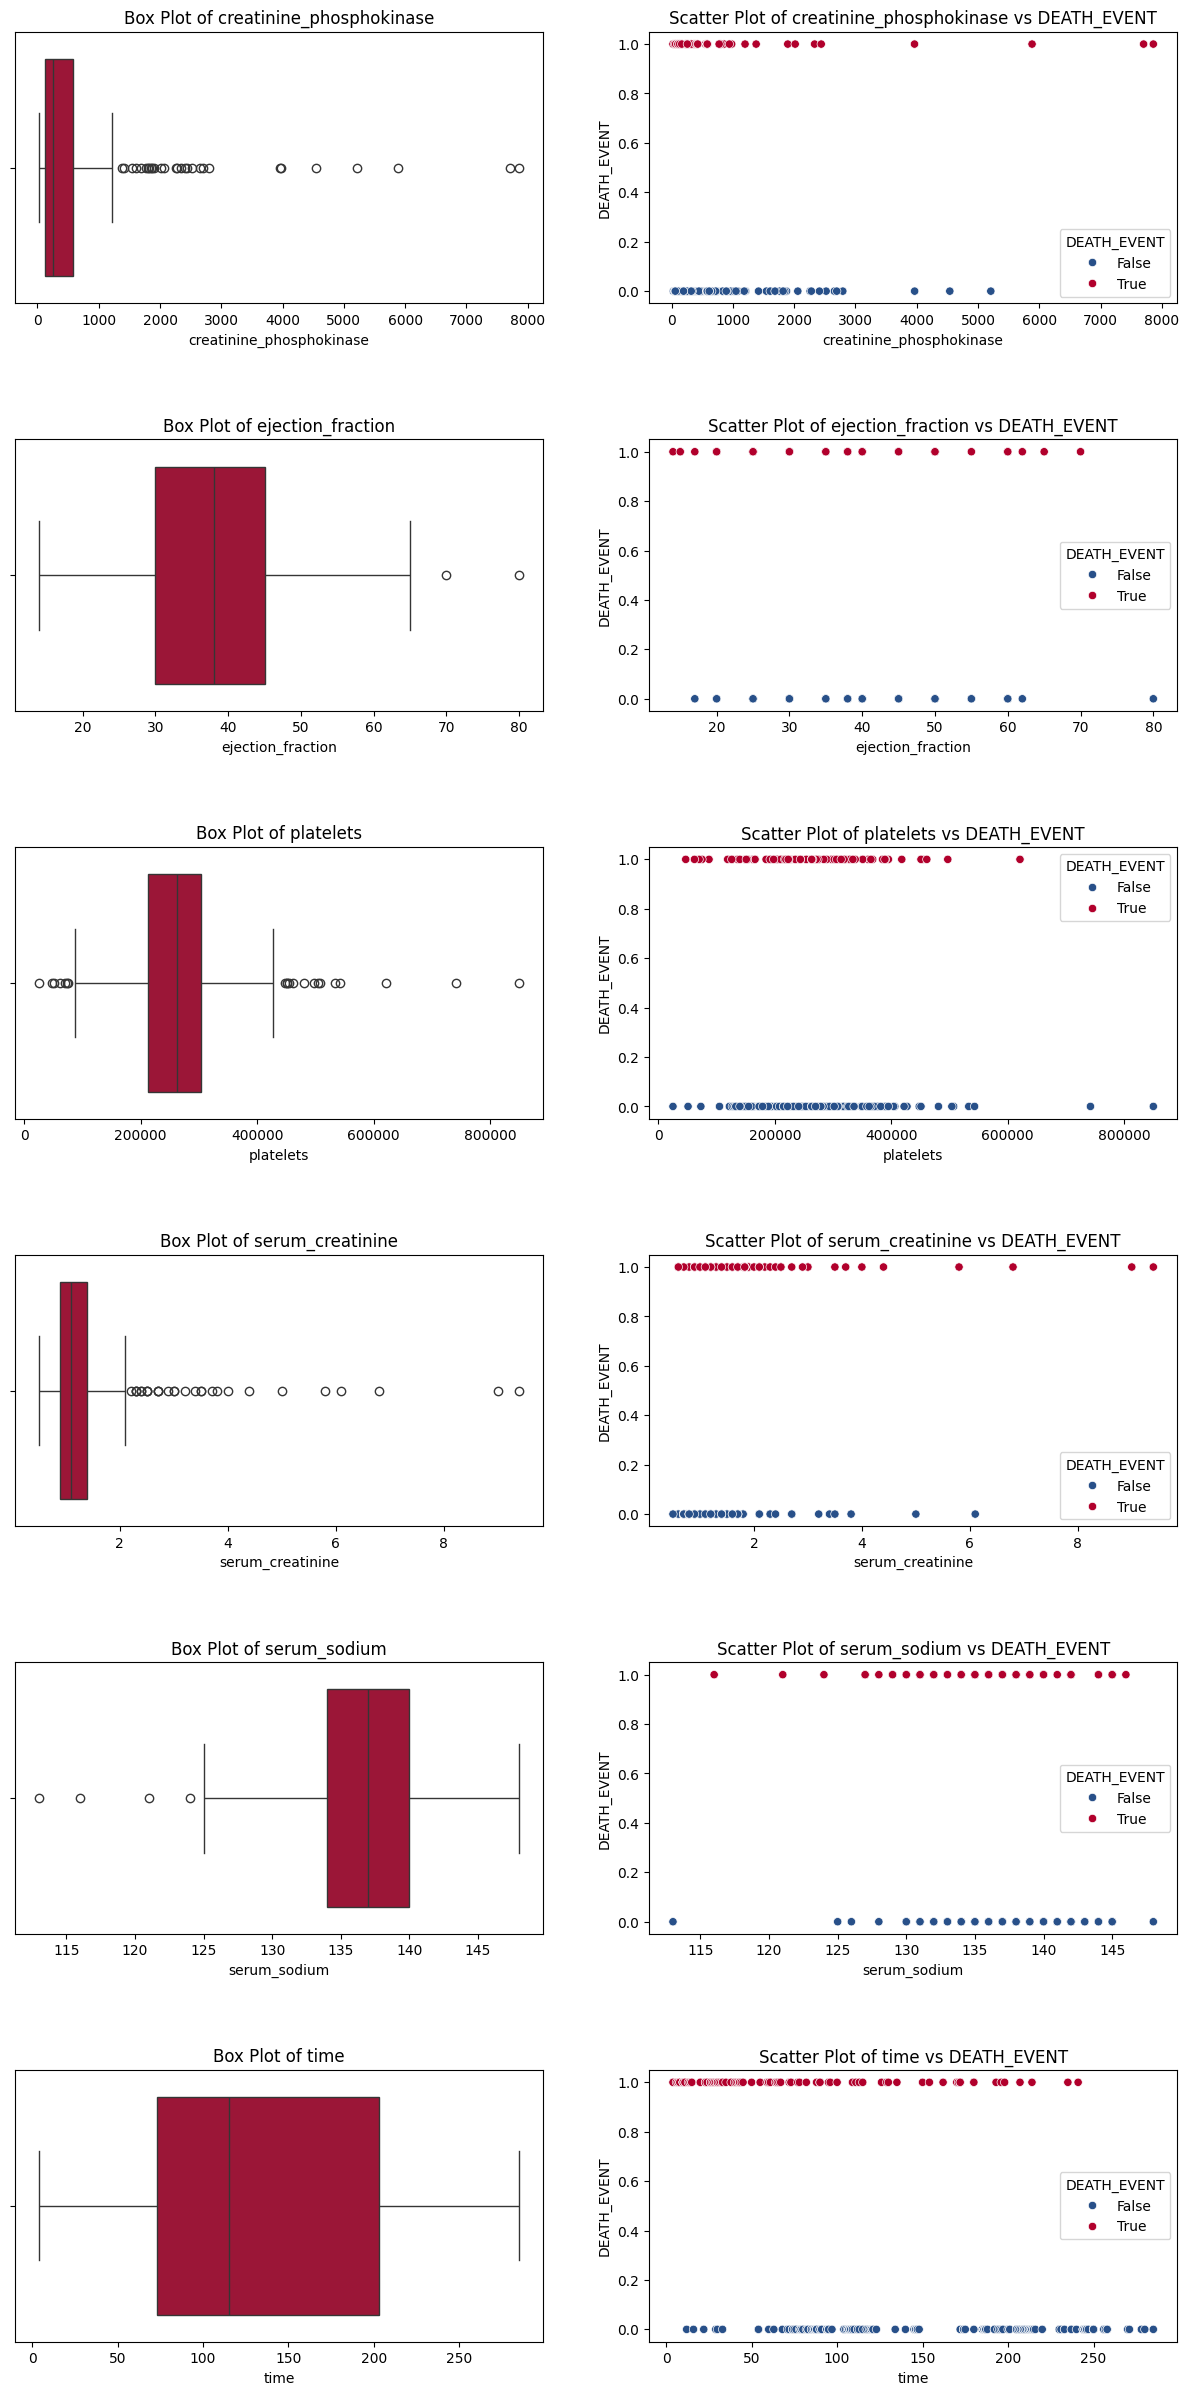

In [ ]:
# List of numerical columns to analyze
numerical_columns = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Placeholder for 'quality' column
quality_column = 'DEATH_EVENT'  # Replace this with the actual column name you want to use for scatter plots

def plot_box_and_scatter(df, columns, quality_col):
    num_plots = len(columns)
    num_rows = (num_plots + 6) // 2  # Calculate the number of rows needed
    num_cols = 2  # Number of columns for the plots

    fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    plt.subplots_adjust(hspace=0.5)

    for i, col in enumerate(columns):
        # Box plot
        sns.boxplot(x=df[col], color="#B1002C", ax=ax[i, 0])
        ax[i, 0].set_title(f'Box Plot of {col}')
        ax[i, 0].set_xlabel(col)

        # Scatter plot
        if quality_col in df.columns:
            # Generate a scatter plot with the custom palette
            sns.scatterplot(x=df[col], y=df[quality_col], hue=df[quality_col], palette=sns.color_palette([
    "#285089",
    "#B1002C"
]), ax=ax[i, 1])
            ax[i, 1].set_title(f'Scatter Plot of {col} vs {quality_col}')
            ax[i, 1].set_xlabel(col)
            ax[i, 1].set_ylabel(quality_col)
        else:
            ax[i, 1].text(0.5, 0.5, f'{quality_col} column not found',
                          horizontalalignment='center', verticalalignment='center',
                          transform=ax[i, 1].transAxes, fontsize=12, color='red')
            ax[i, 1].set_title(f'Scatter Plot of {col} vs {quality_col}')

    # Remove empty subplots if any
    if num_plots % 2 != 0:
        fig.delaxes(ax[-1, 1])  # Remove the extra subplot if the number of plots is odd

    plt.show()

# Plot box plots and scatter plots for numerical columns
plot_box_and_scatter(data, numerical_columns, quality_column)


In [ ]:
def detect_outliers_zscore(data, columns, threshold=3):
    for col in columns:
        z_scores = stats.zscore(data[col].dropna())  # Drop NaN values for Z-score computation
        abs_z_scores = abs(z_scores)
        outliers = (abs_z_scores > threshold)
        print(f"Number of outliers in {col}: {outliers.sum()}")
        print(data[col][outliers])
        print()

# Detect outliers using Z-score
detect_outliers_zscore(data, numerical_columns)

Number of outliers in creatinine_phosphokinase: 7
1      7861
52     3964
60     7702
72     5882
103    5209
134    4540
171    3966
Name: creatinine_phosphokinase, dtype: int64

Number of outliers in ejection_fraction: 1
64    80
Name: ejection_fraction, dtype: int64

Number of outliers in platelets: 3
105    621000.0
109    850000.0
296    742000.0
Name: platelets, dtype: float64

Number of outliers in serum_creatinine: 6
9      9.4
28     5.8
52     6.8
131    6.1
217    9.0
228    5.0
Name: serum_creatinine, dtype: float64

Number of outliers in serum_sodium: 3
4      116
19     121
199    113
Name: serum_sodium, dtype: int64

Number of outliers in time: 0
Series([], Name: time, dtype: int64)



In [ ]:
# Handling outliers

# 2. Cap 'ejection_fraction' based on the 95th percentile
cap_value_ejection_fraction = data['ejection_fraction'].quantile(0.95)
data['ejection_fraction_capped'] = data['ejection_fraction'].clip(upper=cap_value_ejection_fraction)

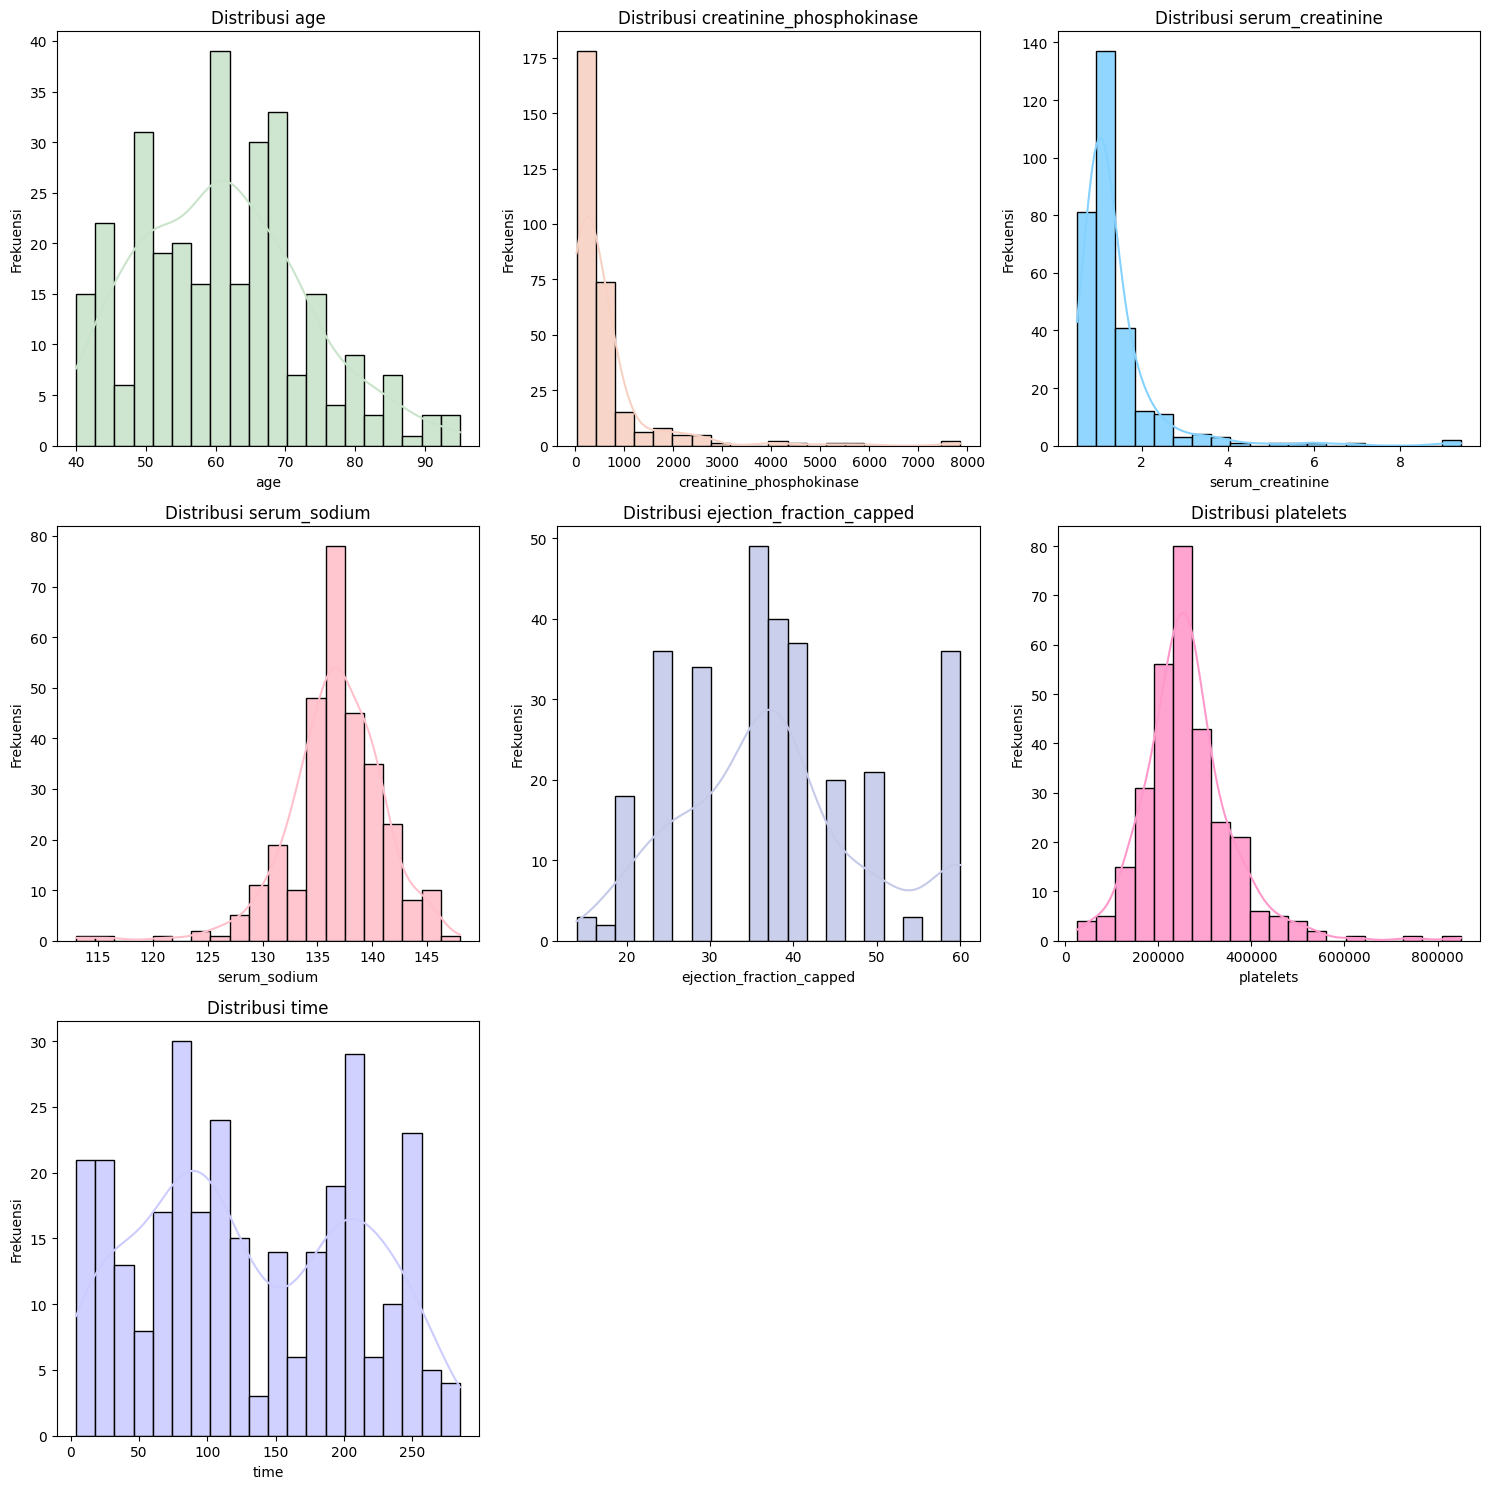

In [ ]:
# Ganti nilai tak terhingga dengan NaN
data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Tentukan palet warna pastel
palette = sns.color_palette(["#C9E4CA", "#F7D2C4", "#85D2FF", "#FFC0CB", "#C5CAE9", "#FF99CC", "#CCCCFF"])

# Daftar fitur numerik untuk plotting
numerical_features = ['age', 'creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'ejection_fraction_capped', 'platelets', 'time']

# Jumlah fitur
num_features = len(numerical_features)

# Jumlah kolom dalam grid plot
num_cols = 3

# Jumlah baris yang dibutuhkan
num_rows = (num_features + num_cols - 1) // num_cols

# Buat figur dan sumbu
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), tight_layout=True)
axes = axes.flatten()

# Plot setiap fitur
for i, (feature, color) in enumerate(zip(numerical_features, palette)):
    sns.histplot(data[feature], kde=True, bins=20, color=color, ax=axes[i], alpha=0.9)
    axes[i].set_title(f'Distribusi {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

# Hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()




In [ ]:
# Fungsi untuk menghitung jumlah dan persentase nilai-nilai unik
def unique_values_summary(data, column_name):
    # # Hitung jumlah dan persentase nilai-nilai unik
    value_counts = data[column_name].value_counts()
    percentages = (data[column_name].value_counts(normalize=True) * 100).round(2)

    # Gabungkan hasil dalam DataFrame
    summary_df = pd.DataFrame({
        'Value': value_counts.index,
        'Count': value_counts.values,
        'Percentage (%)': percentages.values
    })

    return summary_df

# Analisis distribusi nilai 'creatinine_phosphokinase'
creatinine_phosphokinase_summary = unique_values_summary(data, 'creatinine_phosphokinase')
print("Creatinine Phosphokinase Summary:")
print(creatinine_phosphokinase_summary)

# Analisis distribusi nilai 'serum_creatinine'
serum_creatinine_summary = unique_values_summary(data, 'serum_creatinine')
print("\nSerum Creatinine Summary:")
print(serum_creatinine_summary)

Creatinine Phosphokinase Summary:
     Value  Count  Percentage (%)
0      582     47           15.72
1       66      4            1.34
2      129      4            1.34
3      231      3            1.00
4       69      3            1.00
..     ...    ...             ...
203    748      1            0.33
204   1876      1            0.33
205    936      1            0.33
206    292      1            0.33
207   2413      1            0.33

[208 rows x 3 columns]

Serum Creatinine Summary:
    Value  Count  Percentage (%)
0    1.00     50           16.72
1    1.10     32           10.70
2    0.90     32           10.70
3    1.20     24            8.03
4    0.80     24            8.03
5    1.30     20            6.69
6    0.70     19            6.35
7    1.18     11            3.68
8    1.40      9            3.01
9    1.70      9            3.01
10   1.83      8            2.68
11   1.60      6            2.01
12   1.90      5            1.67
13   2.10      5            1.67
14   1.50   

In [ ]:
# Pembagian Data Menjadi Kategori

creatinine_phosphokinase_bins = [0, 100, 200, 500, 1000, 5000, 8000]
serum_creatinine_bins = [0, 1, 2, 3, 4, 10]

# Pembagian Kustom untuk creatinine_phosphokinase
data['creatinine_phosphokinase_bin_custom'] = pd.cut(data['creatinine_phosphokinase'],
bins=creatinine_phosphokinase_bins,
labels=[f'Bin {i+1}' for i in range(len(creatinine_phosphokinase_bins)-1)],
include_lowest=True)

# Pembagian Kustom untuk serum_creatinine
data['serum_creatinine_bin_custom'] = pd.cut(data['serum_creatinine'],
bins=serum_creatinine_bins,
labels=[f'Bin {i+1}' for i in range(len(serum_creatinine_bins)-1)],
include_lowest=True)

# Tampilkan beberapa baris pertama untuk verifikasi
data[['creatinine_phosphokinase', 'creatinine_phosphokinase_bin_custom']].head()
data[['serum_creatinine', 'serum_creatinine_bin_custom']].head()

,serum_creatinine,serum_creatinine_bin_custom
0,1.9,Bin 2
1,1.1,Bin 2
2,1.3,Bin 2
3,1.9,Bin 2
4,2.7,Bin 3


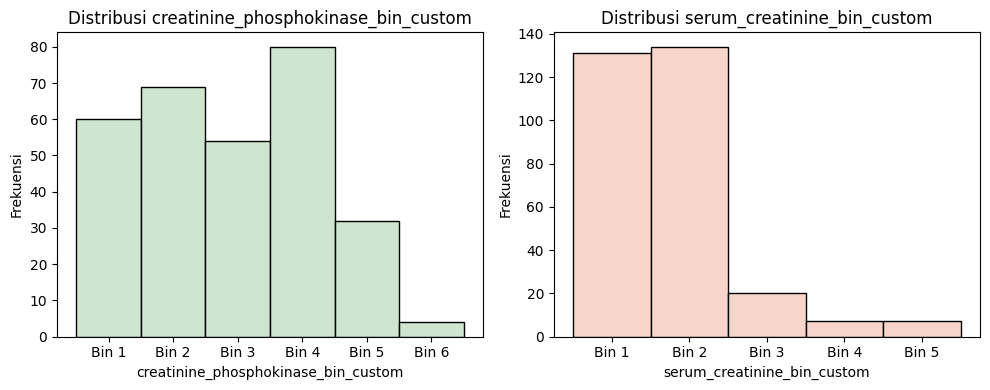

In [ ]:
numerical_features = ['creatinine_phosphokinase_bin_custom', 'serum_creatinine_bin_custom']
colors = ["#C9E4CA", "#F7D2C4"]

plt.figure(figsize=(10, 4))

for i, feature in enumerate(numerical_features):
  plt.subplot(1, 2, i + 1)
  sns.histplot(data[feature], bins=20, color=colors[i], alpha=0.9)
  plt.title(f'Distribusi {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


In [ ]:
# Menampilkan Jumlah Nilai Unik

print(data['creatinine_phosphokinase_bin_custom'].value_counts())
print(data['serum_creatinine_bin_custom'].value_counts())


creatinine_phosphokinase_bin_custom
Bin 4    80
Bin 2    69
Bin 1    60
Bin 3    54
Bin 5    32
Bin 6     4
Name: count, dtype: int64
serum_creatinine_bin_custom
Bin 2    134
Bin 1    131
Bin 3     20
Bin 4      7
Bin 5      7
Name: count, dtype: int64


In [ ]:
# Tentukan batas-batas bin dan label untuk setiap fitur
bins_cpk = [0, 60, 100, 200, 400, 5000, 6000, 8000]
labels_cpk = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5', 'Bin 6', 'Bin 7']
bins_sc = [0, 1, 2, 4, 5, 6, 8, 10]
labels_sc = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5', 'Bin 6', 'Bin 7']

# Pembagian data menjadi kategori
data['creatinine_phosphokinase_bin_custom'] = pd.cut(data['creatinine_phosphokinase'], bins=bins_cpk, labels=labels_cpk)
data['serum_creatinine_bin_custom'] = pd.cut(data['serum_creatinine'], bins=bins_sc, labels=labels_sc)

# Pengkodean Ordinal
# Buat kamus pengkodean ordinal
ordinal_cpk = {label: idx+1 for idx, label in enumerate(labels_cpk)}
ordinal_sc = {label: idx+1 for idx, label in enumerate(labels_sc)}

# Terapkan pengkodean ordinal
data['creatinine_phosphokinase_bin_encoded'] = data['creatinine_phosphokinase_bin_custom'].map(ordinal_cpk)
data['serum_creatinine_bin_encoded'] = data['serum_creatinine_bin_custom'].map(ordinal_sc)

# Tampilkan Hasil
data[['creatinine_phosphokinase', 'creatinine_phosphokinase_bin_custom', 'creatinine_phosphokinase_bin_encoded',
'serum_creatinine', 'serum_creatinine_bin_custom', 'serum_creatinine_bin_encoded']]

,creatinine_phosphokinase,creatinine_phosphokinase_bin_custom,creatinine_phosphokinase_bin_encoded,serum_creatinine,serum_creatinine_bin_custom,serum_creatinine_bin_encoded
0,582,Bin 5,5,1.9,Bin 2,2
1,7861,Bin 7,7,1.1,Bin 2,2
2,146,Bin 3,3,1.3,Bin 2,2
3,111,Bin 3,3,1.9,Bin 2,2
4,160,Bin 3,3,2.7,Bin 3,3
...,...,...,...,...,...,...
294,61,Bin 2,2,1.1,Bin 2,2
295,1820,Bin 5,5,1.2,Bin 2,2
296,2060,Bin 5,5,0.8,Bin 1,1
297,2413,Bin 5,5,1.4,Bin 2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   age                                   299 non-null    float64 
 1   anaemia                               299 non-null    bool    
 2   creatinine_phosphokinase              299 non-null    int64   
 3   diabetes                              299 non-null    bool    
 4   ejection_fraction                     299 non-null    int64   
 5   high_blood_pressure                   299 non-null    bool    
 6   platelets                             299 non-null    float64 
 7   serum_creatinine                      299 non-null    float64 
 8   serum_sodium                          299 non-null    int64   
 9   sex                                   299 non-null    bool    
 10  smoking                               299 non-null    bool    
 11  time  

In [ ]:

# Hapus kolom yang tidak diperlukan
data = data.drop(columns=[
    'creatinine_phosphokinase',
    'serum_creatinine',
    'ejection_fraction',
    'creatinine_phosphokinase_bin_custom',
    'serum_creatinine_bin_custom'
])

# Ganti nama kolom
data = data.rename(columns={
    'ejection_fraction_capped': 'ejection_fraction',
    'creatinine_phosphokinase_bin_encoded': 'creatinine_phosphokinase',
    'serum_creatinine_bin_encoded': 'serum_creatinine',
})

# Tampilkan data yang telah diperbarui
data


,age,anaemia,diabetes,high_blood_pressure,platelets,serum_sodium,sex,smoking,time,DEATH_EVENT,ejection_fraction,creatinine_phosphokinase,serum_creatinine
0,75.0,False,False,True,265000.00,130,True,False,4,True,20,5,2
1,55.0,False,False,False,263358.03,136,True,False,6,True,38,7,2
2,65.0,False,False,False,162000.00,129,True,True,7,True,20,3,2
3,50.0,True,False,False,210000.00,137,True,False,7,True,20,3,2
4,65.0,True,True,False,327000.00,116,False,False,8,True,20,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,False,True,True,155000.00,143,True,True,270,False,38,2,2
295,55.0,False,False,False,270000.00,139,False,False,271,False,38,5,2
296,45.0,False,True,False,742000.00,138,False,False,278,False,60,5,1
297,45.0,False,False,False,140000.00,140,True,True,280,False,38,5,2


In [ ]:
data.columns

Index(['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'platelets',
       'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT',
       'ejection_fraction', 'creatinine_phosphokinase', 'serum_creatinine'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    bool    
 2   diabetes                  299 non-null    bool    
 3   high_blood_pressure       299 non-null    bool    
 4   platelets                 299 non-null    float64 
 5   serum_sodium              299 non-null    int64   
 6   sex                       299 non-null    bool    
 7   smoking                   299 non-null    bool    
 8   time                      299 non-null    int64   
 9   DEATH_EVENT               299 non-null    bool    
 10  ejection_fraction         299 non-null    int64   
 11  creatinine_phosphokinase  299 non-null    category
 12  serum_creatinine          299 non-null    category
dtypes: bool(6), category(2), float64(2), int64(3)
memo

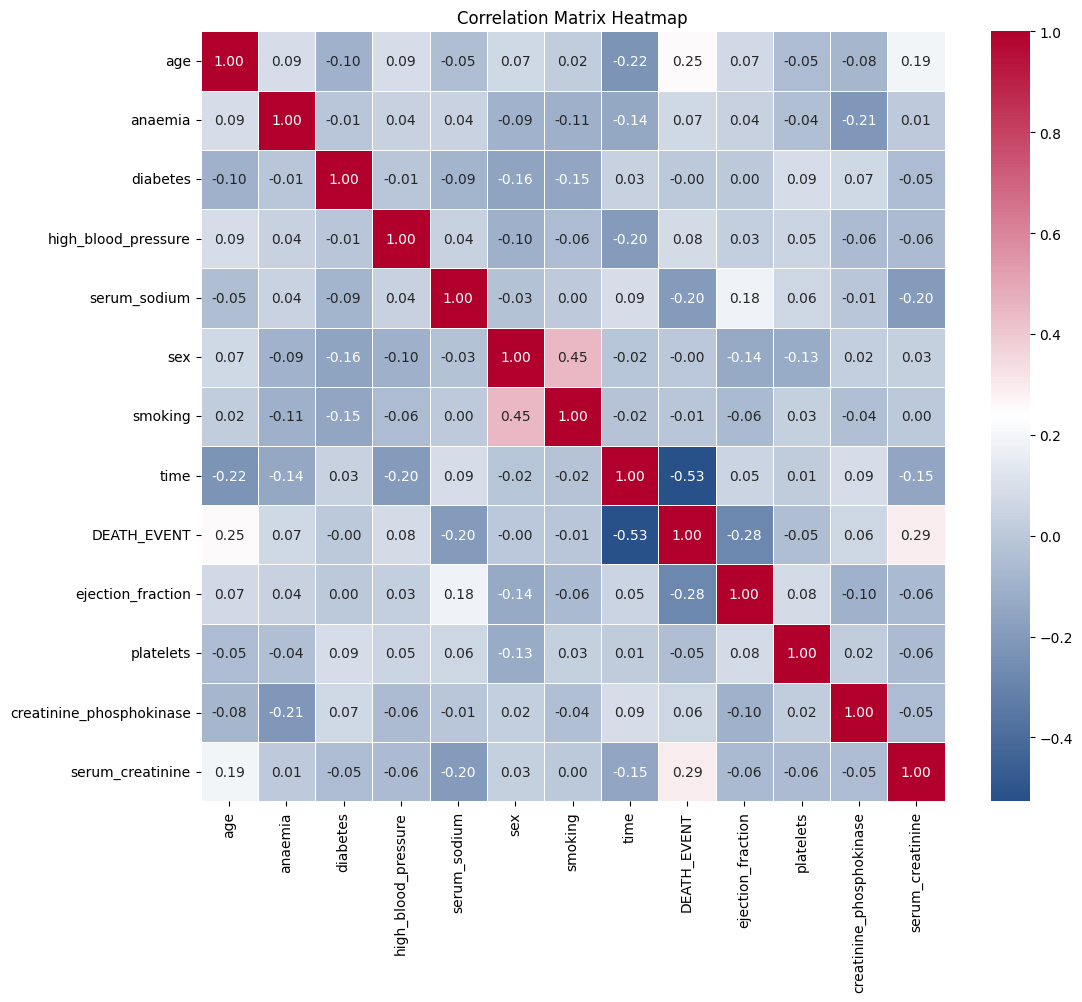

In [ ]:
# Pilih kolom-kolom relevan
selected_columns = [
    'age',
    'anaemia',
    'diabetes',
    'high_blood_pressure',
    'serum_sodium',
    'sex',
    'smoking',
    'time',
    'DEATH_EVENT',
    'ejection_fraction',
    'platelets',
    'creatinine_phosphokinase',
    'serum_creatinine'
]

data_subset = data[selected_columns]

# Hitung matriks korelasi
corr_matrix = data_subset.corr()

# Definisikan colormap kustom
colors = ['#285089', 'white', '#B1002C']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# Definisikan fitur dan target
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state= 42)

# Normalisasi fitur numerik
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
min_max_scaler = MinMaxScaler()
X[numeric_features] = min_max_scaler.fit_transform(X[numeric_features])

# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Latih dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
    print("Matriks Konfusi:")
    print(confusion_matrix(y_test, y_pred))
    print("Laporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

Model: Logistic Regression
Akurasi: 0.83
Matriks Konfusi:
[[87  8]
 [18 37]]
Laporan Klasifikasi:
              precision    recall  f1-score   support

       False       0.83      0.92      0.87        95
        True       0.82      0.67      0.74        55

    accuracy                           0.83       150
   macro avg       0.83      0.79      0.80       150
weighted avg       0.83      0.83      0.82       150

Model: Random Forest
Akurasi: 0.77
Matriks Konfusi:
[[87  8]
 [26 29]]
Laporan Klasifikasi:
              precision    recall  f1-score   support

       False       0.77      0.92      0.84        95
        True       0.78      0.53      0.63        55

    accuracy                           0.77       150
   macro avg       0.78      0.72      0.73       150
weighted avg       0.77      0.77      0.76       150

Model: Gradient Boosting
Akurasi: 0.73
Matriks Konfusi:
[[83 12]
 [28 27]]
Laporan Klasifikasi:
              precision    recall  f1-score   support

     